# This is my solution of the JEM207 midterm
Jachym Svejda,
UKČO: 62263721

Import necessary packages:

In [117]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import datetime

plotconfig = {
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

Part 1

In [130]:
AMGN = pd.read_csv("data/AMGN.csv")
BA = pd.read_csv("data/BA.csv")
MRO =pd.read_csv("data/MRO.csv")
WYNN = pd.read_csv("data/WYNN.csv")

In [136]:
AMGN["Date"] = pd.to_datetime(AMGN["Date"])
BA["Date"] = pd.to_datetime(BA["Date"])
MRO["Date"] = pd.to_datetime(MRO["Date"])
WYNN["Date"] = pd.to_datetime(WYNN["Date"])

1. Is there a company that has no difference between the Close and Adj Close columns?
What does it mean from the financial point of view for the stock (you can get bonus
partial points)?

In [137]:
AMGN["close_diff"] = AMGN["Close"] - AMGN["Adj Close"]
BA["close_diff"] = BA["Close"] - BA["Adj Close"]
MRO["close_diff"] = MRO["Close"] - MRO["Adj Close"]
WYNN["close_diff"] = WYNN["Close"] - WYNN["Adj Close"]

In [138]:
AMGN.close_diff.sum(), BA.close_diff.sum(), MRO.close_diff.sum(), WYNN.close_diff.sum()

(17467.891876220703, 5281.540069580078, 444.65273737907404, 3116.939598083496)

None of the values above are zero hence there is no company that has no difference between the Close and Adj Close columns.

While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. I.e. we can assume that the companies pay e.g. dividiend etc.

2. What is the highest and lowest price (Adj Close) each company recorded?

In [139]:
#AMGN:
AMGN["Adj Close"].max(), AMGN["Adj Close"].min()

(292.3900146484375, 145.319580078125)

In [140]:
#BA
BA["Adj Close"].max(), BA["Adj Close"].min()

(430.2999877929687, 95.01000213623048)

In [141]:
#MRO:
MRO["Adj Close"].max(), MRO["Adj Close"].min()

(33.029998779296875, 3.048149585723877)

In [142]:
#WYNN:
WYNN["Adj Close"].max(), WYNN["Adj Close"].min()

(190.35609436035156, 43.02000045776367)

3. (1pt task) Calculate logarithmic returns from Adj Close. For each company report on
its, min, man, mean, median of the return distribution.

In [143]:
AMGN["log_adj_close"] = AMGN["Adj Close"].apply(np.log)
AMGN["log_adj_close"].agg([min, max, np.mean, np.median])

min       4.978935
max       5.678089
mean      5.295582
median    5.340335
Name: log_adj_close, dtype: float64

In [144]:
BA["log_adj_close"] = BA["Adj Close"].apply(np.log)
BA["log_adj_close"].agg([min, max, np.mean, np.median])

min       4.553982
max       6.064483
mean      5.496171
median    5.485834
Name: log_adj_close, dtype: float64

In [145]:
MRO["log_adj_close"] = MRO["Adj Close"].apply(np.log)
MRO["log_adj_close"].agg([min, max, np.mean, np.median])

min       1.114535
max       3.497416
mean      2.570115
median    2.649175
Name: log_adj_close, dtype: float64

In [146]:
WYNN["log_adj_close"] = WYNN["Adj Close"].apply(np.log)
WYNN["log_adj_close"].agg([min, max, np.mean, np.median])

min       3.761665
max       5.248896
mean      4.644299
median    4.684988
Name: log_adj_close, dtype: float64

4. When did each company record the highest gain and highest loss for the day?
(logarithmic loss). Hint: idxmax

In [147]:
amgn_top_gain = AMGN["log_adj_close"].max()
amgn_top_loss = AMGN["log_adj_close"].min()
AMGN.loc[AMGN["log_adj_close"] == amgn_top_gain]["Date"],AMGN.loc[AMGN["log_adj_close"] == amgn_top_loss]["Date"]

(1255   2022-11-08
 Name: Date, dtype: datetime64[ns],
 94   2018-04-02
 Name: Date, dtype: datetime64[ns])

In [148]:
ba_top_gain = BA["log_adj_close"].max()
ba_top_loss = BA["log_adj_close"].min()
BA.loc[BA["log_adj_close"] == ba_top_gain]["Date"],BA.loc[BA["log_adj_close"] == ba_top_loss]["Date"]

(324   2019-03-01
 Name: Date, dtype: datetime64[ns],
 590   2020-03-20
 Name: Date, dtype: datetime64[ns])

In [149]:
mro_top_gain = MRO["log_adj_close"].max()
mro_top_loss = MRO["log_adj_close"].min()
MRO.loc[MRO["log_adj_close"] == mro_top_gain]["Date"],MRO.loc[MRO["log_adj_close"] == mro_top_loss]["Date"]

(1254   2022-11-07
 Name: Date, dtype: datetime64[ns],
 598   2020-04-01
 Name: Date, dtype: datetime64[ns])

In [150]:
wynn_top_gain = WYNN["log_adj_close"].max()
wynn_top_loss = WYNN["log_adj_close"].min()
WYNN.loc[WYNN["log_adj_close"] == wynn_top_gain]["Date"],WYNN.loc[WYNN["log_adj_close"] == wynn_top_loss]["Date"]

(122   2018-05-10
 Name: Date, dtype: datetime64[ns],
 588   2020-03-18
 Name: Date, dtype: datetime64[ns])

YET TO COMPLETE 5. What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

6. Which company recorded the highest total return over the whole period?

In [151]:
AMGN["return"] = AMGN["Close"] - AMGN["Open"]
amgn_return = AMGN["return"].sum()
BA["return"] = BA["Close"] - BA["Open"]
ba_return = BA["return"].sum()
MRO["return"] = MRO["Close"] - MRO["Open"]
mro_return = MRO["return"].sum()
WYNN["return"] = WYNN["Close"] - WYNN["Open"]
wynn_return = WYNN["return"].sum()

total_returns = [amgn_return, ba_return, mro_return, wynn_return]
for i in range(len(total_returns)):
    if total_returns[i] == max(amgn_return, ba_return, mro_return, wynn_return):
        print(i)



0


Since we got index zero, we can see that the highest total return over the whole period has company AMGN

7. Plot the log-returns of the companies (ideally in the same plot)

In [154]:
AMGN["log_return"] = AMGN["return"].apply(np.log)
BA["log_return"] = BA["return"].apply(np.log)
MRO["log_return"] = MRO["return"].apply(np.log)
WYNN["log_return"] = WYNN["return"].apply(np.log)

In [157]:
AMGN.set_index("Date")
BA.set_index("Date")
MRO.set_index("Date")
WYNN.set_index("Date")

,High,Low,Open,Close,Volume,Adj Close,close_diff,log_adj_close,return,log_return
Date,,,,,,,,,,
2017-11-13,156.399994,153.520004,153.750000,155.240005,1282900.0,145.725998,9.514008,4.981728,1.490005,0.398780
2017-11-14,155.270004,152.279999,154.539993,153.600006,1101200.0,144.186523,9.413483,4.971108,-0.939987,NaN
2017-11-15,152.500000,150.009995,152.500000,151.619995,1191100.0,142.792664,8.827332,4.961394,-0.880005,NaN
2017-11-16,154.300003,151.809998,152.000000,153.199997,1269900.0,144.280685,8.919312,4.971761,1.199997,0.182319
2017-11-17,153.690002,151.979996,152.899994,152.279999,849600.0,143.414230,8.865768,4.965737,-0.619995,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-07,72.790001,69.870003,70.370003,72.279999,3551800.0,72.279999,0.000000,4.280547,1.909996,0.647101
2022-11-08,72.720001,68.980003,72.489998,70.419998,3600900.0,70.419998,0.000000,4.254477,-2.070000,NaN
2022-11-09,70.269997,67.970001,69.489998,68.279999,4201200.0,68.279999,0.000000,4.223617,-1.209999,NaN


<Axes: xlabel='time'>

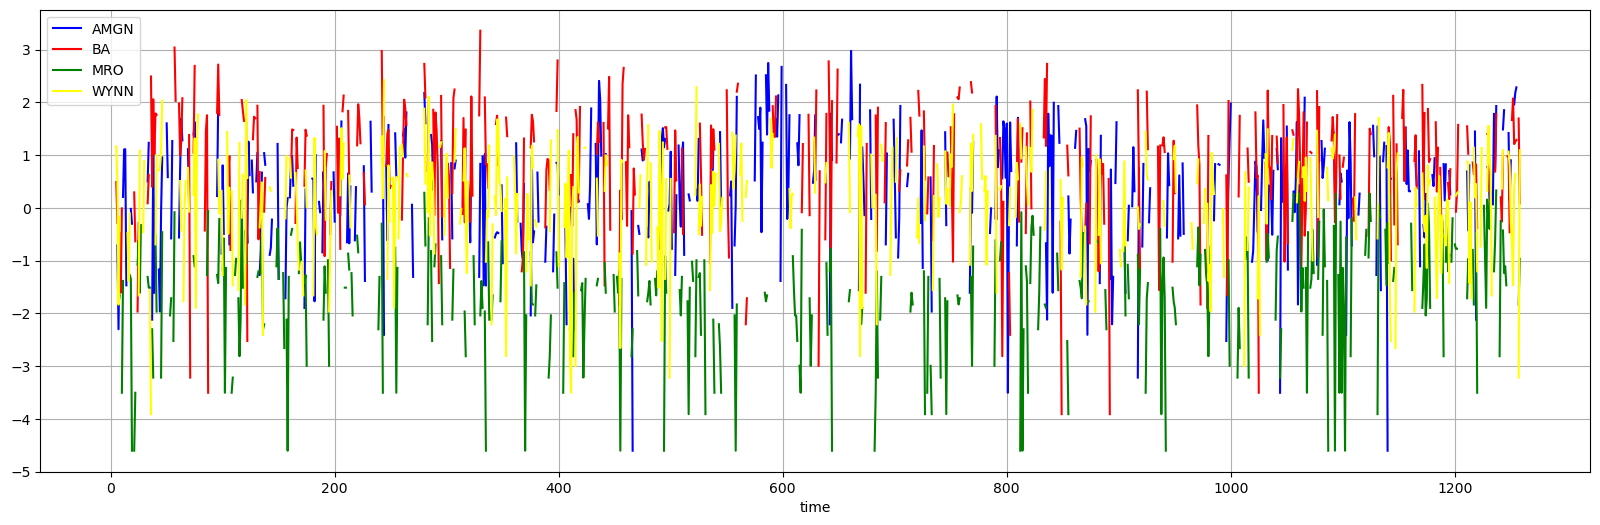

In [159]:
ax = AMGN["log_return"].plot(color = 'blue',label='AMGN',legend=True,**plotconfig)
BA["log_return"].plot(color = 'red',label='BA',legend=True,**plotconfig, ax=ax)
MRO["log_return"].plot(color = 'green',label='MRO',legend=True,**plotconfig, ax = ax)
WYNN["log_return"].plot(color = 'yellow',label='WYNN',legend=True,**plotconfig, ax = ax)

YET TO COMPLETE 8. Show the log-return distribution of the companies (ideally in the same plot)

In [161]:
AMGN["log_to_plot"] = AMGN["log_return"]
for i in range(len(AMGN["log_to_plot"])):
    if AMGN["log_to_plot"].iloc[i] == "-inf":
        AMGN["log_to_plot"].iloc[i] = 0

ValueError: supplied range of [-inf, 2.9755290991305734] is not finite

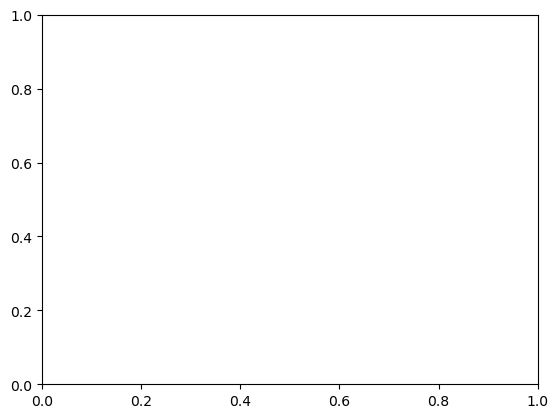

In [162]:
AMGN["log_to_plot"].hist()

PART 2

In [79]:
sap_500 = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

In [80]:
sap_500.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


1. Find out how many companies do not filled-in the date of inclusion (column
“included”) to S&P 500.

In [81]:
sap_500["included"].isna().sum()

45

2. Delete the companies with no inclusion date and calculate which company is the
oldest/youngest constituent and tell us the average age of a constituent in the sample.
If you need to fix anything or make any assumptions, comment on them in the code.
Hint: pd.to_datetime (some date column, dayfirst=True,errors='coerce')

In [87]:
sap_500 = sap_500.dropna(subset="included")
sap_500

,Symbol,Security,GICS_Sector,hq,included,Founded,date_founded,date_included
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1902-01-01,1976-08-09
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,1916-01-01,2017-07-26
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1888-01-01,1964-03-31
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),NaT,2012-12-31
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,1981-01-01,2018-05-31
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997,1997-01-01,1997-10-06
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969,1969-01-01,2019-12-23
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927,1927-01-01,2001-08-07
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873,1873-01-01,2001-06-22


In [86]:
sap_500["date_included"] = pd.to_datetime(sap_500["included"], dayfirst=True,errors='coerce')


/var/folders/zr/40yfwjmx6dqbjgkj5v1_d8r80000gn/T/ipykernel_35185/3057776447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sap_500["date_included"] = pd.to_datetime(sap_500["included"], dayfirst=True,errors='coerce')


In [95]:
first_inclusion = sap_500["date_included"].min()
last_inclusion = sap_500["date_included"].max()

I assume the constituents are taken by the date_included, i.e. the ones with the oldest date_included are the oldest and vice versa.

In [98]:
#oldest constituents
sap_500[sap_500["date_included"] == first_inclusion][["Security"]]

,Security
25,Altria
31,American Electric Power
72,Boeing
77,Bristol Myers Squibb
86,Campbell Soup Company
93,Caterpillar Inc.
105,Chevron Corporation
118,The Coca-Cola Company
120,Colgate-Palmolive
124,ConocoPhillips


In [97]:
#youngest constituent
sap_500[sap_500["date_included"] == last_inclusion][["Security"]]

,Security
48,Arch Capital Group


3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like this)

array([<Axes: ylabel='Symbol'>], dtype=object)

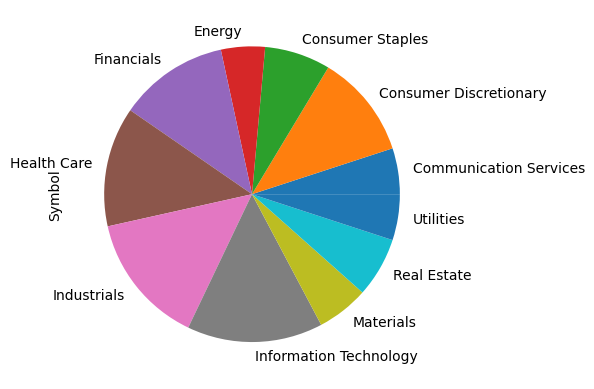

In [171]:
distribution = sap_500.groupby("GICS_Sector")[["Symbol"]].nunique()
distribution.plot.pie(subplots=True, legend = False)

4. Parse the “hq” column, extract the state of the hq and describe the distribution of the
states

array([<Axes: ylabel='Symbol'>], dtype=object)

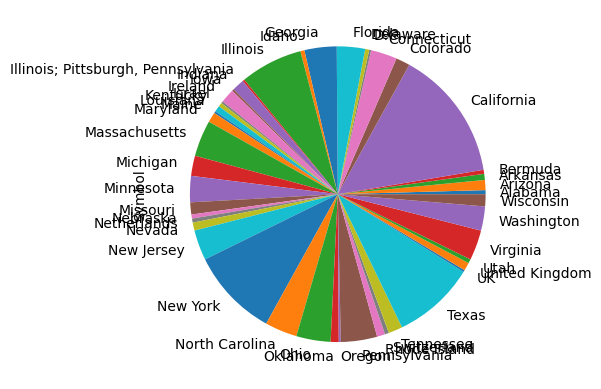

In [177]:

sap_500[['City', 'State']] = sap_500['hq'].str.split(', ', n=1, expand=True)
distr2 = sap_500.groupby("State")[["Symbol"]].nunique()
distr2.plot.pie(subplots=True, legend = False)

5. Join the datasets and join the two datasets based on an appropriate key. Report on distribution of
subindustries for the “Consumer Discretionary” GICS sector.

In [99]:
industries = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")

In [100]:
industries.head()

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [101]:
sap_500.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,date_founded,date_included
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1902,1976-08-09
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,1916,2017-07-26
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1888,1964-03-31
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),NaN,2012-12-31
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,NaN,2018-05-31


In [102]:
merged_df = pd.merge(sap_500, industries, on = "Symbol")
merged_df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,date_founded,date_included,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1902,1976-08-09,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,1916,2017-07-26,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1888,1964-03-31,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),NaN,2012-12-31,Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,NaN,2018-05-31,Health Care Equipment


In [104]:
cons_discret_df = merged_df[merged_df["GICS_Sector"] == "Consumer Discretionary"]
cons_discret_df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,date_founded,date_included,subindustry
10,AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",09.07.2015,1932,NaN,2015-07-09,Automotive Retail
26,AMZN,Amazon,Consumer Discretionary,"Seattle, Washington",18.11.2005,1994,NaN,2005-11-18,Internet & Direct Marketing Retail
46,APTV,Aptiv,Consumer Discretionary,"Dublin, Ireland",24.12.2012,1994,NaN,2012-12-24,Auto Parts & Equipment
54,AZO,AutoZone,Consumer Discretionary,"Memphis, Tennessee",02.01.1997,1979,NaN,1997-01-02,Specialty Stores
60,BBWI,"Bath & Body Works, Inc.",Consumer Discretionary,"Columbus, Ohio",30.09.1983,1963,NaN,1983-09-30,Specialty Stores


In [113]:
df = merged_df.groupby("GICS_Sector", as_index=False)[["subindustry"]].()
df.head()

,GICS_Sector,subindustry
0,Communication Services,10
1,Consumer Discretionary,19
2,Consumer Staples,12
3,Energy,5
4,Financials,12


ValueError: could not convert string to float: 'Automotive Retail'

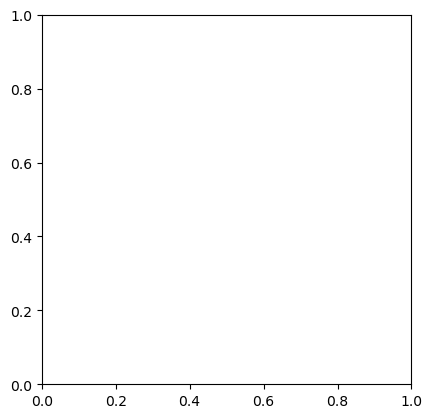